<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Sentiment Analysis of Movie Reviews with Spacy/ textacy and VADER

---

## Learning Objectives
- Understand the goal of basic sentiment analysis
- Calculate sentiment scores manually using a reviews dataset and scores tagged by word
- Practice using the spacy parser to get out part of speech tags from text
- Fit a better model using both **sentiment** and **grammar** features
- Use the VADER sentiment analyzer to get out more accurate sentiment scores and compare the models

<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span></li><li><span><a href="#Introduction-to-sentiment-analysis" data-toc-modified-id="Introduction-to-sentiment-analysis-2">Introduction to sentiment analysis</a></span></li><li><span><a href="#Load-the-word-sentiment-dataset" data-toc-modified-id="Load-the-word-sentiment-dataset-3">Load the word sentiment dataset</a></span><ul class="toc-item"><li><span><a href="#Objectivity-and-positive-difference-scores" data-toc-modified-id="Objectivity-and-positive-difference-scores-3.1">Objectivity and positive difference scores</a></span></li><li><span><a href="#Put-scores-in-a-part-of-speech-dictionary" data-toc-modified-id="Put-scores-in-a-part-of-speech-dictionary-3.2">Put scores in a part of speech dictionary</a></span></li></ul></li><li><span><a href="#Load-the-rotten-tomatoes-reviews-dataset" data-toc-modified-id="Load-the-rotten-tomatoes-reviews-dataset-4">Load the rotten tomatoes reviews dataset</a></span><ul class="toc-item"><li><span><a href="#Restrict-data-to-reviews-with-valid-ratings-['fresh','rotten'],-keep-only-reviews-over-10-words-long-and-add-a-column-with-the-length-of-the-quote:" data-toc-modified-id="Restrict-data-to-reviews-with-valid-ratings-['fresh','rotten'],-keep-only-reviews-over-10-words-long-and-add-a-column-with-the-length-of-the-quote:-4.1">Restrict data to reviews with valid ratings <code>['fresh','rotten']</code>, keep only reviews over 10 words long and add a column with the length of the quote:</a></span></li></ul></li><li><span><a href="#Import-textacy" data-toc-modified-id="Import-textacy-5">Import textacy</a></span><ul class="toc-item"><li><span><a href="#Part-of-Speech" data-toc-modified-id="Part-of-Speech-5.1">Part of Speech</a></span></li><li><span><a href="#Parse-all-the-quotes-using-spacy's-multithreaded-parser" data-toc-modified-id="Parse-all-the-quotes-using-spacy's-multithreaded-parser-5.2">Parse all the quotes using spacy's multithreaded parser</a></span></li></ul></li><li><span><a href="#Assign-sentiment-scores" data-toc-modified-id="Assign-sentiment-scores-6">Assign sentiment scores</a></span></li><li><span><a href="#Print-out-the-most-positive-and-most-negative-reviews" data-toc-modified-id="Print-out-the-most-positive-and-most-negative-reviews-7">Print out the most positive and most negative reviews</a></span></li><li><span><a href="#Print-out-the-most-objective-and-most-subjective-reviews" data-toc-modified-id="Print-out-the-most-objective-and-most-subjective-reviews-8">Print out the most objective and most subjective reviews</a></span></li><li><span><a href="#Build-a-model-to-classify-fresh-vs.-rotten-with-the-sentiment-features" data-toc-modified-id="Build-a-model-to-classify-fresh-vs.-rotten-with-the-sentiment-features-9">Build a model to classify fresh vs. rotten with the sentiment features</a></span></li><li><span><a href="#Use-the-VADER-library-to-get-better-sentiment-scores" data-toc-modified-id="Use-the-VADER-library-to-get-better-sentiment-scores-10">Use the VADER library to get better sentiment scores</a></span><ul class="toc-item"><li><span><a href="#Fit-a-model-using-the-VADER-sentiment-features" data-toc-modified-id="Fit-a-model-using-the-VADER-sentiment-features-10.1">Fit a model using the VADER sentiment features</a></span></li><li><span><a href="#Print-out-the-top-most-negative,-positive,-neutral,-and-subjective-features-by-VADER-score" data-toc-modified-id="Print-out-the-top-most-negative,-positive,-neutral,-and-subjective-features-by-VADER-score-10.2">Print out the top most negative, positive, neutral, and subjective features by VADER score</a></span></li></ul></li><li><span><a href="#Additional-resources" data-toc-modified-id="Additional-resources-11">Additional resources</a></span></li></ul></div>

## Introduction to sentiment analysis


Sentiment analysis is one of the most popular topics in NLP. 
Its main goals are:

- measuring the sentiment conveyed through a text document (word, tweet, sentence, paragraph, etc.) through valence scores (often scaled from -1 to 1 for negative, neutral or positive sentiment expressions)
- assign subjectivity/objectivity scores to a text, i.e. judge if a text reports facts or rather personal opinions

Sentiment analysis is challenging because

- Sentiments can be expressed in very different ways
    - "This is an excellent report."
    - "Alice's project is better than Bob's."
- Sentiment might be expressed in very different ways depending on the context
    - Think about film or hotel reviews or political discussions, in a web forum or in a conversation with your friends
    - Ideally, the text body used for learning to recognize sentiments should stem from the same context of where you want to analyze sentiments
- The same words may convey very different sentiments in different contexts
    - Can you come up with an example?
- Often it is difficult for a human to understand the sentiment contained in a text
    - We will have to learn from examples which should be labeled according to a consistent scheme
    - Having a well-defined scheme for recognizing sentiments might lead to more objective interpretations
    - Different people may use different schemes (which are hopefully reproducable and followed consistently) 

Sentiment analysis is useful if you depend on knowing what people think about your business/product. Monitoring customer feedback or social media content can be crucial to take timely business decisions. Changes in opinion or analyzing how customers see your product in comparison to other brands can give important insights. 

Sentiment analysis may be performed through 

- rule based systems
- machine learning

In the first case, we could try to come up with rules assigning so-called polarity scores to discriminative words (a lexicon) showing each word's tendency for expressing positive or negative sentiment. Then we can produce an average score for all the words contained in a text leading to an overall positive, negative or neutral sentiment score.

That is exactly the way we are going to try out. We will use a list of words with positivity and negativity scores. The words in the list may form common roots of a variety of words obtained through stemming or lemmatization. Therefore, the list contains also distinctions of how a word is tagged in regard of its sentence functionality.
Machine learning techniques are used to take additional context information from the document into account.

With [VADER](https://github.com/cjhutto/vaderSentiment) we will also explore a more advanced sentiment analysis library in python. We can parse 
text documents and compare to our more basic method.

## Load the word sentiment dataset


Below we will load in some pre-tagged positive and negative valence scores for a lexicon of words. Each row of the dataset contains 
- the part of speech
- the word
- the positivity score
- the negativity score 

for the word. A word may appear more than once if it can appear with different part of speech tags. A part of speech tag labels the grammatical functionality of a word. 

In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} pandas
!conda install --yes --prefix {sys.prefix} numpy
!conda install --yes --prefix {sys.prefix} matplotlib.pyplot
!conda install --yes --prefix {sys.prefix} seaborn
!conda install --yes --prefix {sys.prefix} tqdm
!conda update --yes --prefix {sys.prefix} scikit-learn
!{sys.executable} -m pip install vaderSentiment

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [39]:
from tqdm import tqdm_notebook

In [40]:
sen = pd.read_csv('../../../../resource-datasets/sentiment_words/sentiment_words.csv')
sen.pos = sen.pos.map(lambda x: x.upper())
sen.pos.unique()

array(['ADJ', 'NOUN', 'ADV', 'VERB'], dtype=object)

In [41]:
sen.head()

,pos,word,pos_score,neg_score
0,ADJ,.22-caliber,0.0,0.0
1,ADJ,.22-calibre,0.0,0.0
2,ADJ,.22_caliber,0.0,0.0
3,ADJ,.22_calibre,0.0,0.0
4,ADJ,.38-caliber,0.0,0.0


In [42]:
sen.shape

(155287, 4)

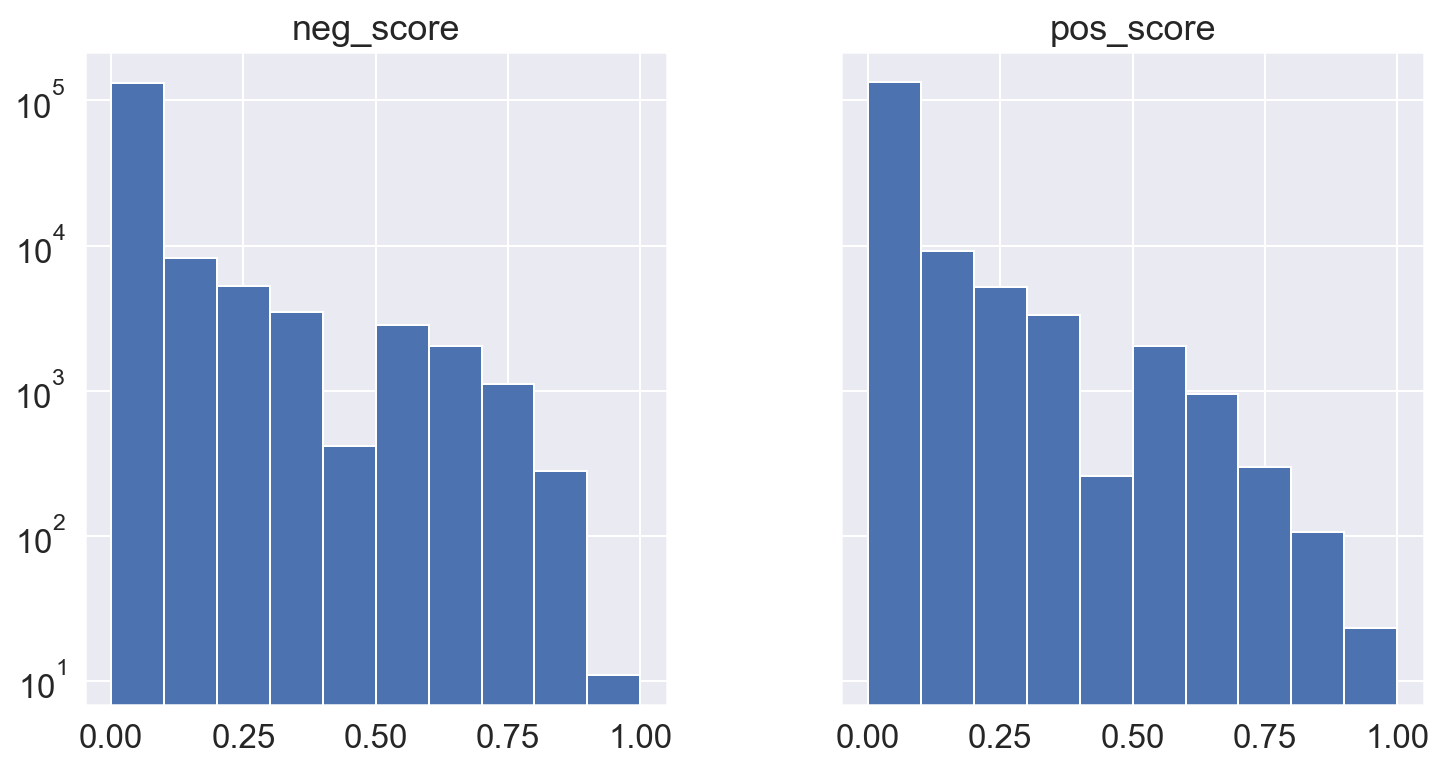

In [43]:
sen.hist(figsize=(12,6), sharey=True)
plt.yscale('log')
plt.show()

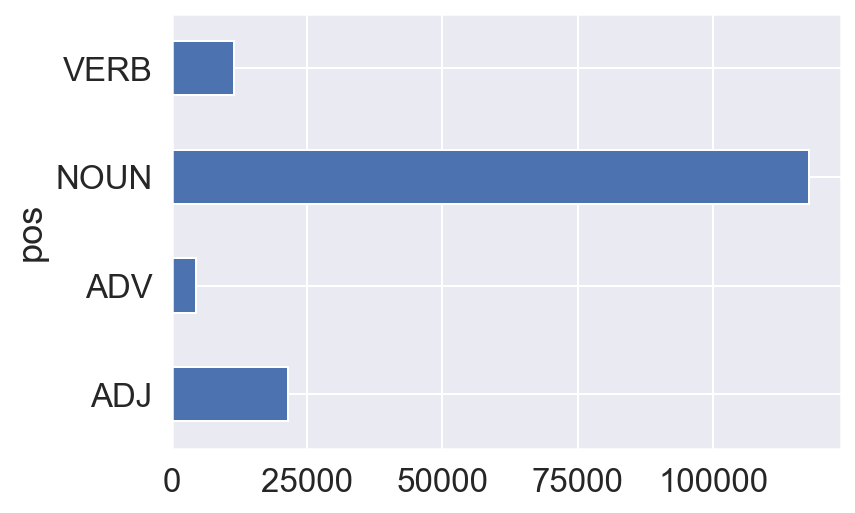

In [44]:
sen.groupby('pos')['word'].count().plot(kind='barh')
plt.show()

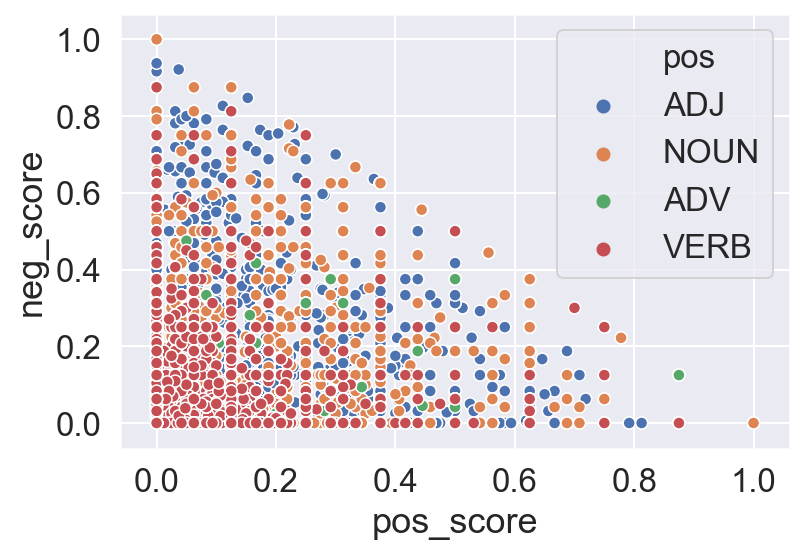

In [45]:
sns.scatterplot(x='pos_score', y='neg_score', data=sen, hue='pos')
plt.show()

In [46]:
# highest positive scores
sen[sen.pos_score==1]

,pos,word,pos_score,neg_score
6696,ADJ,excellent,1.0,0.0
6968,ADJ,fantabulous,1.0,0.0
7203,ADJ,first-class,1.0,0.0
8771,ADJ,homologic,1.0,0.0
8772,ADJ,homological,1.0,0.0
18401,ADJ,top-flight,1.0,0.0
18404,ADJ,top-hole,1.0,0.0
18418,ADJ,topping,1.0,0.0
20267,ADJ,unsurpassable,1.0,0.0
22857,NOUN,admirability,1.0,0.0


In [47]:
# highest negative scores
sen[sen.neg_score==1]

,pos,word,pos_score,neg_score
3686,ADJ,cheapjack,0.0,1.0
8534,ADJ,henpecked,0.0,1.0
10290,ADJ,lamentable,0.0,1.0
25791,NOUN,angriness,0.0,1.0
32976,NOUN,blackguard,0.0,1.0
91963,NOUN,motormouth,0.0,1.0
115694,NOUN,scut_work,0.0,1.0
117755,NOUN,shitwork,0.0,1.0


In [48]:
sen.groupby('pos').describe()

pos_score                                                     neg_score  \
         count      mean       std  min  25%     50%    75%    max     count   
pos                                                                            
ADJ    21479.0  0.108988  0.180866  0.0  0.0  0.0000  0.125  1.000   21479.0   
ADV     4481.0  0.125392  0.149138  0.0  0.0  0.0625  0.250  0.875    4481.0   
NOUN  117798.0  0.022605  0.084410  0.0  0.0  0.0000  0.000  1.000  117798.0   
VERB   11529.0  0.037890  0.096660  0.0  0.0  0.0000  0.000  0.875   11529.0   

                                                       
          mean       std  min  25%  50%    75%    max  
pos                                                    
ADJ   0.149058  0.223503  0.0  0.0  0.0  0.250  1.000  
ADV   0.035423  0.106936  0.0  0.0  0.0  0.000  0.875  
NOUN  0.033018  0.111323  0.0  0.0  0.0  0.000  1.000  
VERB  0.051217  0.125121  0.0  0.0  0.0  0.025  0.875

### Objectivity and positive difference scores

The following two scores are often used to recognize how much sentiment is contained (objectivity) or how much polarization (tendency to one side) is contained:

    objectivity = 1. - (pos_score + neg_score)
    pos_vs_neg = pos_score - neg_score

Thus if a score has zero positive score and negative score it is completely objective. If a score has, for example, 0.5 positive and 0.5 negative, it may not be any more positive than negative but we can tell that it is subjective (objectivity = 0).

Objectivity ranges from 0 to 1, whereas the positive difference score ranges from -1 to 1.

In [49]:
sen['objectivity'] = 1. - (sen.pos_score + sen.neg_score)
sen['pos_vs_neg'] = sen.pos_score - sen.neg_score

In [50]:
sen.head()

,pos,word,pos_score,neg_score,objectivity,pos_vs_neg
0,ADJ,.22-caliber,0.0,0.0,1.0,0.0
1,ADJ,.22-calibre,0.0,0.0,1.0,0.0
2,ADJ,.22_caliber,0.0,0.0,1.0,0.0
3,ADJ,.22_calibre,0.0,0.0,1.0,0.0
4,ADJ,.38-caliber,0.0,0.0,1.0,0.0


Some words may be used in different ways. This is also an effect of stemming/lemmatization.

In [51]:
sen[sen.word=='clear']

,pos,word,pos_score,neg_score,objectivity,pos_vs_neg
3929,ADJ,clear,0.404412,0.058824,0.536765,0.345588
42289,NOUN,clear,0.125000,0.000000,0.875000,0.125000
139922,ADV,clear,0.187500,0.000000,0.812500,0.187500
145638,VERB,clear,0.062500,0.020833,0.916667,0.041667


In [52]:
sen[sen.word=='true']

,pos,word,pos_score,neg_score,objectivity,pos_vs_neg
18657,ADJ,true,0.322917,0.0625,0.614583,0.260417
131158,NOUN,true,0.500000,0.0000,0.500000,0.500000
143304,ADV,true,0.000000,0.0000,1.000000,0.000000
154529,VERB,true,0.000000,0.0000,1.000000,0.000000


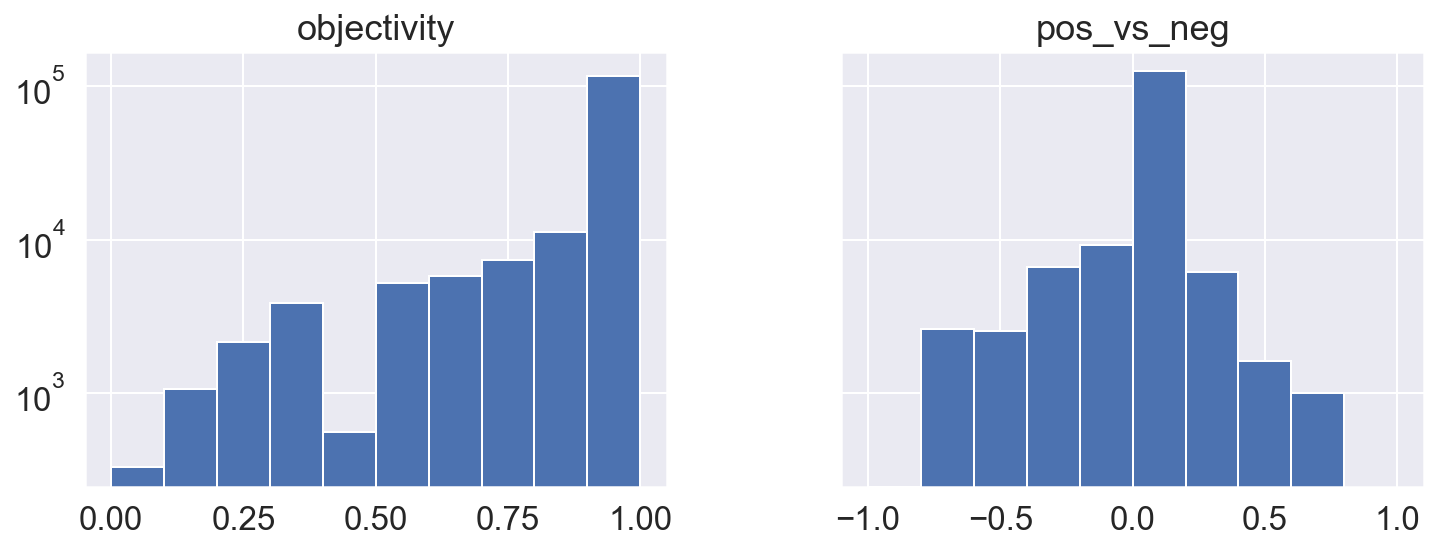

In [53]:
sen[['objectivity', 'pos_vs_neg']].hist(figsize=(12,4), sharey=True)
plt.yscale('log')
plt.show()

### Put scores in a part of speech dictionary

The dictionary format of the data will be much easier to index using our parsing functions later on. Create a dictionary where the keys are the four part of speech tags:

    ADJ
    NOUN
    VERB
    ADV

For each key, store a dictionary that contains all of the words for that part of speech with their objectivity and positive vs. negative scores, ie:

```
{'ADJ': {'.22-caliber': {'objectivity': 1.0, 'pos_vs_neg': 0.0},
  '.22-calibre': {'objectivity': 1.0, 'pos_vs_neg': 0.0},
    etc.
```

In [54]:
# iterate over dataframe rows
list(sen.head(3).itertuples())

[Pandas(Index=0, pos='ADJ', word='.22-caliber', pos_score=0.0, neg_score=0.0, objectivity=1.0, pos_vs_neg=0.0),
 Pandas(Index=1, pos='ADJ', word='.22-calibre', pos_score=0.0, neg_score=0.0, objectivity=1.0, pos_vs_neg=0.0),
 Pandas(Index=2, pos='ADJ', word='.22_caliber', pos_score=0.0, neg_score=0.0, objectivity=1.0, pos_vs_neg=0.0)]

In [55]:
from collections import defaultdict
sen_dict = defaultdict(dict) # set up a default dictionary with an empty dictionary as default value

for row in tqdm_notebook(sen.itertuples()):
    sen_dict[row.pos] [row.word] = {'objectivity': row.objectivity, 'pos_vs_neg': row.pos_vs_neg}

/Users/Noah/anaconda3/envs/textacy/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [56]:
# check number of words per tag
[(key, len(sen_dict[key])) for key in  sen_dict.keys()]

[('ADJ', 21479), ('NOUN', 117797), ('ADV', 4481), ('VERB', 11529)]

In [57]:
# check an entry
sen_dict['ADJ']['happy']

{'objectivity': 0.4375, 'pos_vs_neg': 0.5625}

## Load the rotten tomatoes reviews dataset


This dataset has:
    
    critic: critic's name
    fresh: fresh vs. rotten rating
    imdb: code for imdb
    publication: where the review was published
    quote: the review snippet
    review_date: date of review
    rtid: rottentomatoes id
    title: name of movie
    
These reviews contain quotes with several words inside. We want to obtain average sentiment scores for these quotes based on our lexicon from above.

In [5]:
rt = pd.read_csv('../../../../resource-datasets/rotten_tomatoes/rt_critics.csv')

NameError: name 'pd' is not defined

In [6]:
rt.head()

NameError: name 'rt' is not defined

In [7]:
rt.shape

NameError: name 'rt' is not defined

In [61]:
print(rt.quote[0])

So ingenious in concept, design and execution that you could watch it on a postage stamp-sized screen and still be engulfed by its charm.


### Restrict data to reviews with valid ratings `['fresh','rotten']`, keep only reviews over 10 words long and add a column with the length of the quote:

In [62]:
rt = rt[rt.fresh.isin(['fresh','rotten'])]
rt.fresh = rt.fresh.map(lambda x: 1 if x == 'fresh' else 0)

In [63]:
rt['quote_len'] = rt.quote.map(lambda x: len(x.split()))
rt = rt[rt.quote_len > 10]
rt.shape

(11215, 9)

In [64]:
rt.head(3)

,critic,fresh,imdb,publication,quote,review_date,rtid,title,quote_len
0,Derek Adams,1,114709.0,Time Out,"So ingenious in concept, design and execution ...",2009-10-04,9559.0,Toy story,24
2,David Ansen,1,114709.0,Newsweek,A winning animated feature that has something ...,2008-08-18,9559.0,Toy story,13
3,Leonard Klady,1,114709.0,Variety,The film sports a provocative and appealing st...,2008-06-09,9559.0,Toy story,17


## Import textacy


The spacy package is a very useful package for parsing the grammatical structure of text. 
Textacy gives us some added functionality on top of spacy. We are going to use it to find the part of speech tags for the review words.
Once we have parsed the tags with textacy, we can assign objectivity and valence scores by finding the match in our sentiment dataset.

- [Spacy](https://spacy.io)
- [Textacy](https://github.com/chartbeat-labs/textacy)

In [65]:
# execute this on the command line
# python -m spacy download en

In [66]:
import textacy

In [67]:
en_nlp = textacy.load_spacy_lang('en_core_web_sm')

**Parse a single quote:**

In [68]:
rt.head(3)

,critic,fresh,imdb,publication,quote,review_date,rtid,title,quote_len
0,Derek Adams,1,114709.0,Time Out,"So ingenious in concept, design and execution ...",2009-10-04,9559.0,Toy story,24
2,David Ansen,1,114709.0,Newsweek,A winning animated feature that has something ...,2008-08-18,9559.0,Toy story,13
3,Leonard Klady,1,114709.0,Variety,The film sports a provocative and appealing st...,2008-06-09,9559.0,Toy story,17


In [69]:
rt['quote'][0]

'So ingenious in concept, design and execution that you could watch it on a postage stamp-sized screen and still be engulfed by its charm.'

In [70]:
parsed = en_nlp(rt['quote'][0])

In [71]:
parsed

So ingenious in concept, design and execution that you could watch it on a postage stamp-sized screen and still be engulfed by its charm.

In [72]:
# we can get out single words with indexing:
parsed[3]

concept

### Part of Speech

**Print out the part of speech tags for each word in the quote:**

| POS   | DESCRIPTION               | EXAMPLES                                      |
|-------|---------------------------|-----------------------------------------------|
| ADJ   | adjective                 | big, old, green, incomprehensible, first      |
| ADP   | adposition                | in, to, during                                |
| ADV   | adverb                    | very, tomorrow, down, where, there            |
| AUX   | auxiliary                 | is, has (done), will (do), should (do)        |
| CONJ  | conjunction               | and, or, but                                  |
| CCONJ | coordinating conjunction  | and, or, but                                  |
| DET   | determiner                | a, an, the                                    |
| INTJ  | interjection              | psst, ouch, bravo, hello                      |
| NOUN  | noun                      | girl, cat, tree, air, beauty                  |
| NUM   | numeral                   | 1, 2017, one, seventy-seven, IV, MMXIV        |
| PART  | particle                  | 's, not,                                      |
| PRON  | pronoun                   | I, you, he, she, myself, themselves, somebody |
| PROPN | proper noun               | Mary, John, London, NATO, HBO                 |
| PUNCT | punctuation               | ., (, ), ?                                    |
| SCONJ | subordinating conjunction | if, while, that                               |
| SYM   | symbol                    | $, %, §, ©, +, −, ×, ÷, =, :), 😝              |
| VERB  | verb                      | run, runs, running, eat, ate, eating          |
| X     | other                     | sfpksdpsxmsa                                  |
| SPACE | space                     |                                               |

We need the part of speech tags to look up the correct scores in our reference dictionary.

In [73]:
for token in parsed:
    print(token.pos_)

ADV
ADJ
ADP
NOUN
PUNCT
NOUN
CCONJ
NOUN
DET
PRON
VERB
VERB
PRON
ADP
DET
ADJ
NOUN
PUNCT
ADJ
NOUN
CCONJ
ADV
AUX
VERB
ADP
DET
NOUN
PUNCT


### Parse all the quotes using spacy's multithreaded parser

Parsing a lot of text can take quite a while. Luckily textacy comes with multithreading functionality to speed up the process considerably. Below is code that will parse the quotes across multiple threads and assign them to a list.

In [74]:
parsed_quotes = []
for parsed in tqdm_notebook(en_nlp.pipe(rt['quote'][:20], batch_size=50)):
    assert parsed.is_parsed
    parsed_quotes.append(parsed)

/Users/Noah/anaconda3/envs/textacy/lib/python3.6/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [75]:
[(token, token.pos_) for token in parsed_quotes[1]]

[(A, 'DET'),
 (winning, 'VERB'),
 (animated, 'VERB'),
 (feature, 'NOUN'),
 (that, 'DET'),
 (has, 'AUX'),
 (something, 'PRON'),
 (for, 'ADP'),
 (everyone, 'PRON'),
 (on, 'ADP'),
 (the, 'DET'),
 (age, 'NOUN'),
 (spectrum, 'NOUN'),
 (., 'PUNCT')]

In [76]:
[(token, token.lemma_) for token in parsed_quotes[1]]

[(A, 'a'),
 (winning, 'win'),
 (animated, 'animate'),
 (feature, 'feature'),
 (that, 'that'),
 (has, 'have'),
 (something, 'something'),
 (for, 'for'),
 (everyone, 'everyone'),
 (on, 'on'),
 (the, 'the'),
 (age, 'age'),
 (spectrum, 'spectrum'),
 (., '.')]

In [77]:
def process_text(documents, pos=False):
    '''
    cleans sentences from stop words and punctuation and filters by pos tags if given
    returns cleaned sentence and tokenized sentence
    '''
    nlp = textacy.load_spacy_lang('en_core_web_sm')
    
    texts = []
    tokenised_texts = []

    if pos: # pos can either be False or a list of parts of speech
        for document in tqdm_notebook(nlp.pipe(documents, batch_size=200)):
            assert document.is_parsed
            tokens = [token
                      for token in document 
                      if token.is_stop == False
                      and token.pos_ in pos
                      and token.pos_ != 'PUNCT']
            doc_ = ''
            for token in tokens:
                doc_ += str(token) + ' '
            
            doc_ = doc_.strip()
            texts.append(doc_)
            tokenised_texts.append(tokens)
    
    
    else:    
        for document in tqdm_notebook(nlp.pipe(documents, batch_size=200)):
            assert document.is_parsed
            tokens = [token
                      for token in document 
                      if token.is_stop == False
                      and token.pos_ != 'PUNCT']
            doc_ = ''
            for token in tokens:
                doc_ += str(token) + ' '
            
            doc_ = doc_.strip()
            texts.append(doc_)
            tokenised_texts.append(tokens)
            
    return texts, tokenised_texts

In [78]:
pos = ['NOUN', 'ADJ', 'VERB', 'ADV']

In [79]:
process_text(rt['quote'][:2], pos=pos)

/Users/Noah/anaconda3/envs/textacy/lib/python3.6/site-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


(['ingenious concept design execution watch postage stamp sized screen engulfed charm',
  'winning animated feature age spectrum'],
 [[ingenious,
   concept,
   design,
   execution,
   watch,
   postage,
   stamp,
   sized,
   screen,
   engulfed,
   charm],
  [winning, animated, feature, age, spectrum]])

In [80]:
processed_quotes, tokenised_quotes = process_text(rt['quote'], pos=pos)

/Users/Noah/anaconda3/envs/textacy/lib/python3.6/site-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


In [81]:
rt['processed_quote'] = processed_quotes
rt['tokenised_quotes'] = tokenised_quotes

In [82]:
rt.head()

,critic,fresh,imdb,publication,quote,review_date,rtid,title,quote_len,processed_quote,tokenised_quotes
0,Derek Adams,1,114709.0,Time Out,"So ingenious in concept, design and execution ...",2009-10-04,9559.0,Toy story,24,ingenious concept design execution watch posta...,"[ingenious, concept, design, execution, watch,..."
2,David Ansen,1,114709.0,Newsweek,A winning animated feature that has something ...,2008-08-18,9559.0,Toy story,13,winning animated feature age spectrum,"[winning, animated, feature, age, spectrum]"
3,Leonard Klady,1,114709.0,Variety,The film sports a provocative and appealing st...,2008-06-09,9559.0,Toy story,17,film sports provocative appealing story bit eq...,"[film, sports, provocative, appealing, story, ..."
4,Jonathan Rosenbaum,1,114709.0,Chicago Reader,"An entertaining computer-generated, hyperreali...",2008-03-10,9559.0,Toy story,14,entertaining computer generated hyperrealist a...,"[entertaining, computer, generated, hyperreali..."
5,Michael Booth,1,114709.0,Denver Post,"As Lion King did before it, Toy Story revived ...",2007-05-03,9559.0,Toy story,40,revived art American children animation ushere...,"[revived, art, American, children, animation, ..."


## Assign sentiment scores


We will now use the parsed reviews and the sentiment dataset to assign the average objectivity and positive vs. negative scores.

If a word cannot be found in the dataset we can ignore it. If a review has no words that match something in our dataset, one can assign overall neutral scores of `objectivity = 1` and `pos_vs_neg = 0`.

There are definitely problems with this approach, but for now we can keep it simple and see if things improve when we use the VADER analyzer later.

In [83]:
def scorer(parsed):
    """
    Determines the average objectivity and positive-versus-negative scores 
    for a given sentence
    """
   
    obj_scores, pvn_scores = [], []
    for token in parsed:
        try:
            obj_scores.append(sen_dict[token.pos_][token.lemma_]['objectivity'])
            pvn_scores.append(sen_dict[token.pos_][token.lemma_]['pos_vs_neg'])
        except:
            pass
        
    # set default values if no token found
    if not obj_scores:
        obj_scores = [1.]
    if not pvn_scores:
        pvn_scores = [0.]
        
    return [np.mean(obj_scores), np.mean(pvn_scores)]

In [84]:
scores = rt['tokenised_quotes'].map(scorer)
rt['objectivity_avg'] = scores.map(lambda x: x[0])
rt['polarity_avg'] = scores.map(lambda x: x[1])

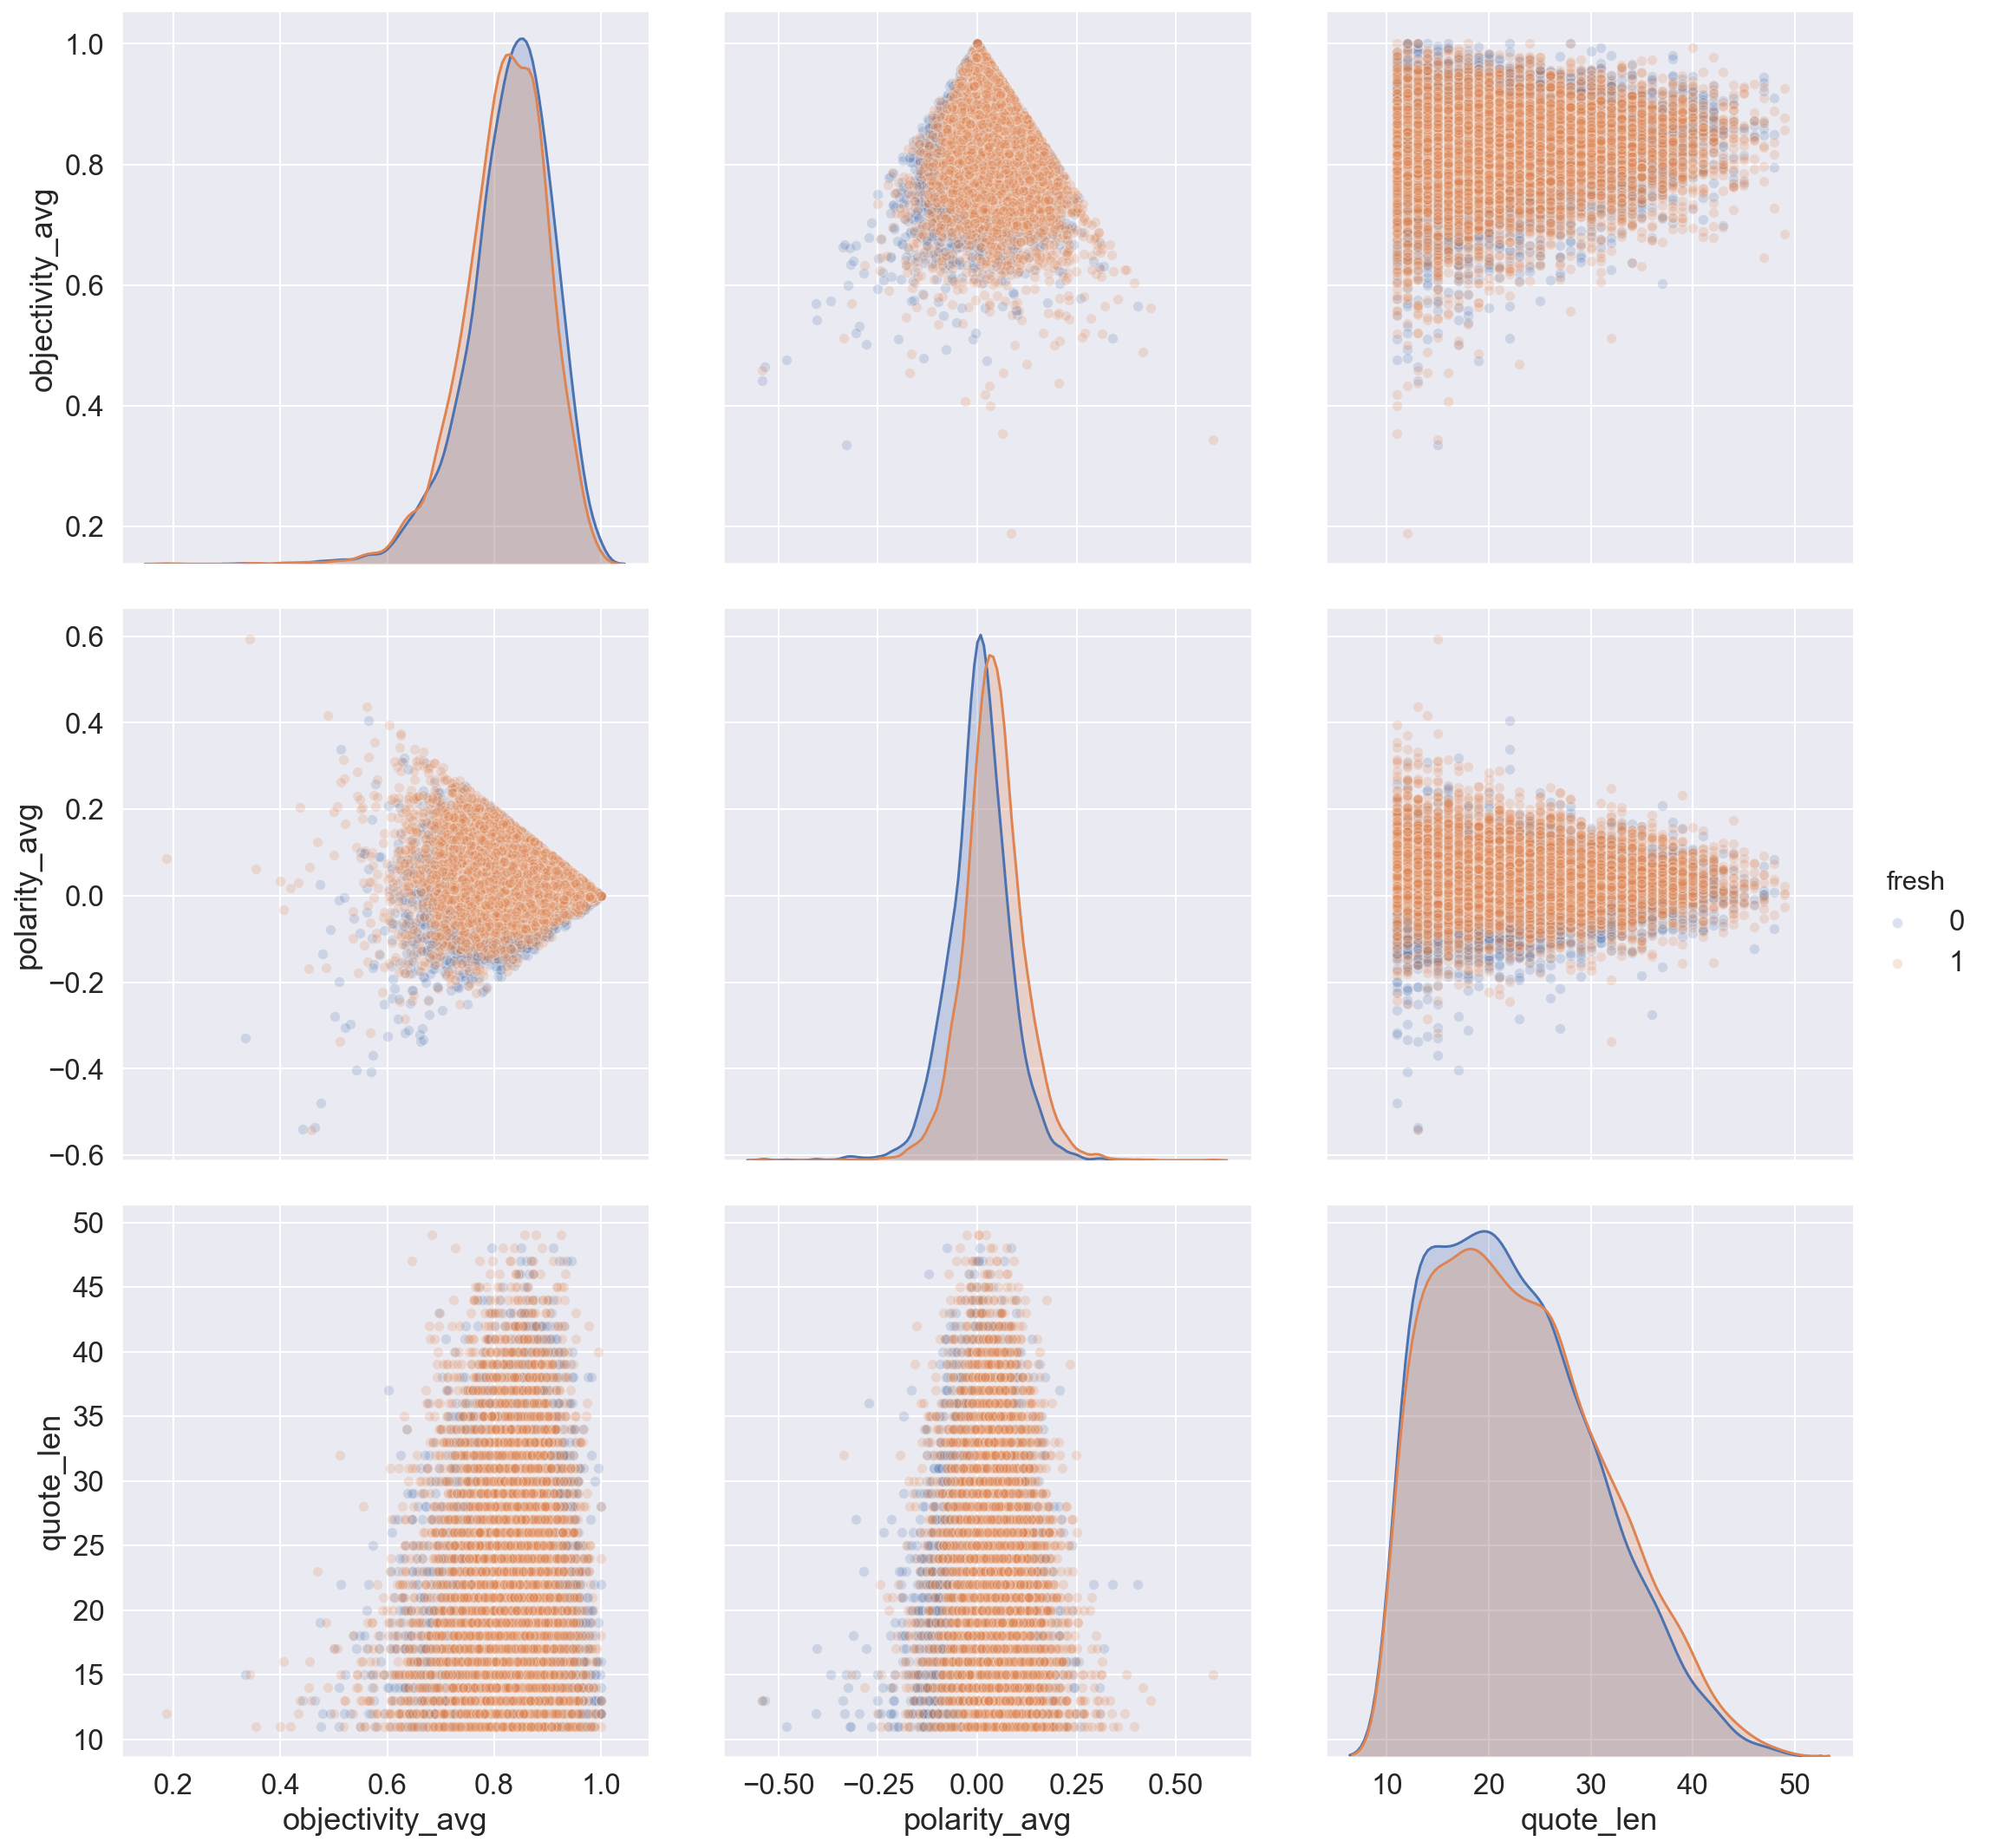

In [85]:
sns.pairplot(rt, vars=['objectivity_avg', 'polarity_avg', 'quote_len'], hue='fresh', 
             plot_kws={'alpha': 0.2}, height=5)
plt.show()

In [86]:
rt.head()

,critic,fresh,imdb,publication,quote,review_date,rtid,title,quote_len,processed_quote,tokenised_quotes,objectivity_avg,polarity_avg
0,Derek Adams,1,114709.0,Time Out,"So ingenious in concept, design and execution ...",2009-10-04,9559.0,Toy story,24,ingenious concept design execution watch posta...,"[ingenious, concept, design, execution, watch,...",0.868750,0.104464
2,David Ansen,1,114709.0,Newsweek,A winning animated feature that has something ...,2008-08-18,9559.0,Toy story,13,winning animated feature age spectrum,"[winning, animated, feature, age, spectrum]",0.943750,0.056250
3,Leonard Klady,1,114709.0,Variety,The film sports a provocative and appealing st...,2008-06-09,9559.0,Toy story,17,film sports provocative appealing story bit eq...,"[film, sports, provocative, appealing, story, ...",0.816919,0.080808
4,Jonathan Rosenbaum,1,114709.0,Chicago Reader,"An entertaining computer-generated, hyperreali...",2008-03-10,9559.0,Toy story,14,entertaining computer generated hyperrealist a...,"[entertaining, computer, generated, hyperreali...",0.850521,0.048438
5,Michael Booth,1,114709.0,Denver Post,"As Lion King did before it, Toy Story revived ...",2007-05-03,9559.0,Toy story,40,revived art American children animation ushere...,"[revived, art, American, children, animation, ...",0.911644,0.055345


## Print out the most positive and most negative reviews


Now that we have the average valence for reviews, try printing out the top 10 most positive and top 10 most negative reviews to visually verify that our approach makes sense.

In [87]:
rt.sort_values('polarity_avg',ascending=False).head(10)

,critic,fresh,imdb,publication,quote,review_date,rtid,title,quote_len,processed_quote,tokenised_quotes,objectivity_avg,polarity_avg
11694,Jay Carr,1,58182.0,Boston Globe,"We loved them -- yeah, yeah, yeah. Now we can ...",2000-12-08,9421.0,A Hard Day's Night,15,loved love,"[loved, love]",0.343750,0.593750
12086,Variety Staff,1,57076.0,Variety,"From Russia with Love is a preposterous, skill...",2008-04-15,10737.0,From Russia with Love,13,preposterous skillful slab,"[preposterous, skillful, slab]",0.562500,0.437500
2099,Jonathan F. Richards,1,497465.0,Film.com,"The performances are all wonderful, but top ho...",2008-08-22,770680718.0,Vicky Cristina Barcelona,14,performances wonderful honors amazing,"[performances, wonderful, honors, amazing]",0.489063,0.417187
10327,Jay Boyar,0,92086.0,Orlando Sentinel,The happy-go-lucky Three Amigos is a picture t...,2014-04-25,10202.0,¡Three Amigos!,22,happy lucky picture expectations good,"[happy, lucky, picture, expectations, good]",0.565417,0.404702
2910,Roger Ebert,1,100405.0,Chicago Sun-Times,The sweetest and most openhearted love fable s...,2000-01-01,13006.0,Pretty Woman,11,sweetest openhearted love fable,"[sweetest, openhearted, love, fable]",0.604167,0.395833
3803,Cath Clarke,1,54698.0,Time Out,It's as ditsy and delightful as ever - with ch...,2011-01-18,16985.0,Breakfast at Tiffany's,15,ditsy delightful charm forgive plenty,"[ditsy, delightful, charm, forgive, plenty]",0.625000,0.375000
2729,Ty Burr,1,57012.0,Boston Globe,Is Dr. Strangelove Kubrick's best movie? Along...,2004-11-05,12368.0,Dr. Strangelove or: How I Learned to Stop Worr...,12,best movie absolutely,"[best, movie, absolutely]",0.625000,0.371032
6290,Rick Groen,1,116477.0,Globe and Mail,"This Hamlet may not be perfect, but it is perf...",2002-04-12,12690.0,Hamlet,11,perfect perfectly engrossing,"[perfect, perfectly, engrossing]",0.576389,0.354167
1831,Desson Thomson,1,109830.0,Washington Post,"Hanks is superb, reemploying the childlike pre...",2000-01-01,10036.0,Forrest Gump,11,superb reemploying childlike presence brought,"[superb, reemploying, childlike, presence, bro...",0.622633,0.343277
9981,Charles Taylor,0,120794.0,Salon.com,"The Prince of Egypt is middlebrow kitsch, but ...",2000-01-01,10366.0,The Prince of Egypt,22,straining respectability energy entertaining,"[straining, respectability, energy, entertaining]",0.512401,0.339782


In [88]:
rt.sort_values('polarity_avg',ascending=True).head(10)

,critic,fresh,imdb,publication,quote,review_date,rtid,title,quote_len,processed_quote,tokenised_quotes,objectivity_avg,polarity_avg
12633,Jonathan Rosenbaum,1,59646.0,Chicago Reader,Roman Polanski's first film in English is stil...,2007-09-21,17112.0,Repulsion,13,film scariest disturbing,"[film, scariest, disturbing]",0.458333,-0.541667
9931,Roger Ebert,0,124198.0,Chicago Sun-Times,Peter Berg's Very Bad Things isn't a bad movie...,2000-01-01,16423.0,Very Bad Things,13,Bad bad movie reprehensible,"[Bad, bad, movie, reprehensible]",0.441964,-0.540179
2481,Roger Ebert,0,110687.0,Chicago Sun-Times,I hated this movie. Hated hated hated hated ha...,2000-01-01,152392086.0,North,13,hated movie hated hated hated movie Hated,"[hated, movie, hated, hated, hated, movie, Hated]",0.464286,-0.535714
6818,Mick LaSalle,0,120179.0,San Francisco Chronicle,They keep getting worse and worse and worse . . .,2000-01-01,12541.0,Speed 2: Cruise Control,11,getting worse worse worse,"[getting, worse, worse, worse]",0.476314,-0.479539
10366,Joe Morgenstern,0,124298.0,Wall Street Journal,Unfortunately Mr. Fraser comes off as a forlor...,2014-03-21,10388.0,Blast from the Past,12,Unfortunately comes forlorn outsize,"[Unfortunately, comes, forlorn, outsize]",0.569444,-0.406746
7992,Peter Travers,0,120591.0,Rolling Stone,I hate Armageddon for what it is: the unholy s...,2001-05-11,17022.0,Armageddon,17,hate unholy spawn,"[hate, unholy, spawn]",0.541667,-0.402778
10685,Owen Gleiberman,0,120836.0,Entertainment Weekly,It would be difficult to imagine material more...,2000-01-01,11821.0,Lost & Found,15,difficult imagine material wrong,"[difficult, imagine, material, wrong]",0.572917,-0.368056
4215,Peter Stack,0,117011.0,San Francisco Chronicle,"It just simmers down, becoming an embarrassing...",2000-01-01,15020.0,Maximum Risk,13,simmers embarrassing exercise pointless predic...,"[simmers, embarrassing, exercise, pointless, p...",0.662500,-0.337500
11149,Lloyd Rose,1,185937.0,Washington Post,"The Blair Witch Project"" is the scariest movie...",2013-10-05,13062.0,The Blair Witch Project,32,scariest movie seen goriest grossest weirdest ...,"[scariest, movie, seen, goriest, grossest, wei...",0.511384,-0.337054
9672,Paul Tatara,0,120484.0,CNN.com,"As a whole, it's not so much stupid as it is b...",2000-01-01,10169.0,The Waterboy,12,stupid boring,"[stupid, boring]",0.666667,-0.333333


## Print out the most objective and most subjective reviews

Do the same as above, but now sort by the objectivity. What kind of differences do you notice between these? Does our approach actually appear to capture meaningful subjectivity and objectivity in the reviews?

In [89]:
rt.sort_values('objectivity_avg',ascending=False).head(10)

,critic,fresh,imdb,publication,quote,review_date,rtid,title,quote_len,processed_quote,tokenised_quotes,objectivity_avg,polarity_avg
4189,Peter Rainer,1,58946.0,New York Magazine,The most electrifyingly timely movie playing i...,2004-08-07,133039722.0,La battaglia di Algeri,13,electrifyingly timely movie playing,"[electrifyingly, timely, movie, playing]",1.0,0.0
5678,Paul Attanasio,0,90967.0,Washington Post,It's not that the movie doesn't move fast enou...,2000-01-01,13621.0,Down by Law,22,movie fast dawdles dwell,"[movie, fast, dawdles, dwell]",1.0,0.0
83,Susan Wloszczyna,1,113189.0,USA Today,It's BS -- Babes and Stunts -- and that's wher...,2000-01-01,12812.0,GoldenEye,12,excels,[excels],1.0,0.0
13802,A.O. Scott,0,220099.0,New York Times,The songs seem to have been written over lunch...,2000-01-01,9475.0,The Tigger Movie,13,songs written lunch cafeteria,"[songs, written, lunch, cafeteria]",1.0,0.0
11995,Kenneth Turan,1,111512.0,Los Angeles Times,This is one of the films that made Jackie Chan...,2000-01-01,13717.0,Jui kuen II,12,films,[films],1.0,0.0
7297,Kevin Thomas,1,119080.0,Los Angeles Times,There has never been a film quite like Kasi Le...,2001-02-14,13454.0,Eve's Bayou,13,film shimmering,"[film, shimmering]",1.0,0.0
1664,Richard Harrington,1,114614.0,Washington Post,The result is a bracing film that's halfway be...,2000-01-01,13494.0,Tank Girl,28,result bracing film halfway string videos edgy...,"[result, bracing, film, halfway, string, video...",1.0,0.0
12697,Mick LaSalle,0,1046947.0,San Francisco Chronicle,What's in it for Emma? And the answer is ... n...,2009-01-16,770784001.0,Last Chance Harvey,12,answer,[answer],1.0,0.0
4853,Mike Clark,1,117318.0,USA Today,"Like 12 Angry Men, it's a civics lesson that w...",2000-01-01,15475.0,The People vs. Larry Flynt,18,civics lesson regaling film enthusiasts decades,"[civics, lesson, regaling, film, enthusiasts, ...",1.0,0.0
3063,Bill Muller,0,317919.0,Arizona Republic,Director Abrams seems to have attended the Ton...,2006-05-05,155654854.0,Mission: Impossible III,12,attended,[attended],1.0,0.0


In [90]:
rt.sort_values('objectivity_avg',ascending=True).head(10)

,critic,fresh,imdb,publication,quote,review_date,rtid,title,quote_len,processed_quote,tokenised_quotes,objectivity_avg,polarity_avg
5238,Sean Means,1,86190.0,Film.com,A mediocre Star Wars is better than no Star Wa...,2000-01-01,11366.0,Star Wars: Episode VI - Return of the Jedi,12,mediocre better,"[mediocre, better]",0.187500,0.085500
11189,James Berardinelli,0,139414.0,ReelViews,Lake Placid isn't so bad that it's good; it's ...,2000-01-01,16700.0,Lake Placid,15,bad good bad bad,"[bad, good, bad, bad]",0.334821,-0.328869
11694,Jay Carr,1,58182.0,Boston Globe,"We loved them -- yeah, yeah, yeah. Now we can ...",2000-12-08,9421.0,A Hard Day's Night,15,loved love,"[loved, love]",0.343750,0.593750
6947,Lawrence Van Gelder,1,119190.0,New York Times,"George of the Jungle may be unsophisticated, b...",2000-01-01,10567.0,George of the Jungle,11,unsophisticated enjoyable,"[unsophisticated, enjoyable]",0.354167,0.062500
2110,Janet Maslin,1,106400.0,New York Times,"You'll hate yourself for enjoying this, but en...",2004-08-30,9997.0,The Beverly Hillbillies,11,hate enjoying enjoy,"[hate, enjoying, enjoy]",0.400000,0.033333
12398,Moira MacDonald,1,454848.0,Seattle Times,"Inside Man is a potboiler, but an intriguing o...",2006-03-24,126518499.0,Inside Man,16,potboiler intriguing,"[potboiler, intriguing]",0.406250,-0.031250
10000,Richard Corliss,1,128445.0,TIME Magazine,You also have to admire the creepy arrogance o...,2008-08-12,12953.0,Rushmore,11,admire creepy arrogance performance,"[admire, creepy, arrogance, performance]",0.418750,0.018750
2267,Richard Harrington,1,106880.0,Washington Post,"Fear of a Black Hat is not brilliant, but it's...",2000-01-01,13500.0,Fear of a Black Hat,12,Fear brilliant bright,"[Fear, brilliant, bright]",0.433333,0.030556
6623,Kevin Thomas,1,120389.0,Los Angeles Times,Turbo is a solid follow-up to the entertaining...,2001-02-14,12077.0,Turbo: A Power Rangers Movie,13,solid follow entertaining,"[solid, follow, entertaining]",0.437500,0.204167
9931,Roger Ebert,0,124198.0,Chicago Sun-Times,Peter Berg's Very Bad Things isn't a bad movie...,2000-01-01,16423.0,Very Bad Things,13,Bad bad movie reprehensible,"[Bad, bad, movie, reprehensible]",0.441964,-0.540179


## Build a model to classify fresh vs. rotten with the sentiment features


Let's use the features we've created to construct a Logistic Regression to predict whether a review is fresh vs. rotten. 

Don't forget to check the baseline score, and it's a good practice to standardize your predictors.

## Use the VADER library to get better sentiment scores

- [VADER](https://github.com/cjhutto/vaderSentiment)

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
vader = SentimentIntensityAnalyzer()

In [4]:
analyzer = SentimentIntensityAnalyzer()
for sentence in rt.quote.values[0:2]:
    vs = analyzer.polarity_scores(sentence)
    print(sentence)
    print(vs)

NameError: name 'rt' is not defined

You can see that these scores look more legitimate. VADER polarity score dictionaries have 4 elements: `neg`, `pos`, `neu` and `compound`. The compound score is a single metric that represents the "overall" valence.

**Calculate the four scores for each review and save them as features in the dataframe.**

In [ ]:
vader_scores = rt['quote'].map(analyzer.polarity_scores)

In [ ]:
vader_scores.head()

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
dvec = DictVectorizer()

vader_scores = dvec.fit_transform(vader_scores)
vader_scores

In [ ]:
dvec.feature_names_

In [ ]:
for i, col in enumerate(dvec.feature_names_):
    rt['vader_{}'.format(col)] = vader_scores[:, i].toarray().ravel()

In [ ]:
rt.head()

### Fit a model using the VADER sentiment features

Does this model perform better? 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
X = rt[['vader_neg','vader_pos','vader_neu','vader_compound','quote_len']].astype(float)
y = rt.fresh

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

lr = LogisticRegression(solver='liblinear')
lr.fit(Xs, y)

scores = cross_val_score(lr, Xs, y, cv=10)
print(scores)
print(np.mean(scores))

# We do slightly better. I've also left out the part of speech stuff so that has an impact too.

In [ ]:
for v, c in zip(X.columns, lr.coef_[0]):
    print(v, '\t', c)
    
# All the coefficients make sense.

### Print out the top most negative, positive, neutral, and subjective features by VADER score

In [ ]:
rt.head(1)

In [ ]:
for quote in rt.sort_values('vader_neg', ascending=False)['quote'][0:10]:
    print(quote)
    print('============================================================\n')

In [ ]:
for quote in rt.sort_values('vader_pos', ascending=False)['quote'][0:10]:
    print(quote)
    print('============================================================\n')

In [ ]:
for quote in rt.sort_values('vader_neu', ascending=False)['quote'][0:10]:
    print(quote)
    print('============================================================\n')

In [ ]:
for quote in rt.sort_values('vader_neu', ascending=True)['quote'][0:10]:
    print(quote)
    print('============================================================\n')

## Additional resources 


- [Monkeylearn Sentiment Analysis Overview](https://monkeylearn.com/sentiment-analysis/)
- [KDNuggets Sentiment Analysis Practitioner Guide](https://www.kdnuggets.com/2018/08/emotion-sentiment-analysis-practitioners-guide-nlp-5.html)
- [VADER](https://github.com/cjhutto/vaderSentiment)
- [TextBlob](https://textblob.readthedocs.io/en/dev/)